# Analiza danych z pliku tekstowego Cell_Phones_&_Accessories.txt
***
# 1 Cel zadania
Celem w zadaniu jest analiza danych z pliku tekstowego Cell_Phones_&_Accessories.txt oraz uzyskanie z niego jak największej ilości informacji.
# 2 Propozycje informacji które można uzyskać z tekstu
- Ilu gwiazdkom odpowiada dana recenzja? Na podstawie tekstu recenzji zostanie wygenerowana jej ocena w skali(1-5). (w tym notatniku)
- Generator krótkiego podsumowania na podstawie tekstu recenzji. (w notatniku 2)
- Analiza statystyczna danych. Bez Machine Learningu. (w notatniku 3)
# Uwaga
Komentarze we fragmentach kodu pisane są w języku angielskim

In [1]:
# Just some imports
import matplotlib.pyplot as plt
import shutil
import numpy as np
import os
import random
import pickle
import pandas as pd
from common.data_loader import file_loader
from common.preprocess import preprocess_dict

# Just the name of our input file. Now we dont need to remember it 
phones_file_name: str
phones_file_name = "source/Cell_Phones_&_Accessories.txt"

Wczytajmy plik

In [2]:
data: list = []
next_dict: dict = {"dictionary": 1} 
gen = file_loader(phones_file_name)
while True:
    next_dict = next(gen)
    if next_dict == {}:
        break
    data.append(next_dict)
print(f"Ilosc wpisow: {len(data)}")
print("Przykładowa recenzja:")
print(data[0])

# Some preprocessing
preprocess_dict(data)

# Let's use pandas
data_pd = pd.DataFrame(data)
print(data_pd)

Ilosc wpisow: 78930
Przykładowa recenzja:
{'product/productId': 'B000JVER7W', 'product/title': 'Mobile Action MA730 Handset Manager - Bluetooth Data Suite', 'product/price': 'unknown', 'review/userId': 'A1RXYH9ROBAKEZ', 'review/profileName': 'A. Igoe', 'review/helpfulness': '0/0', 'review/score': '1.0', 'review/time': '1233360000', 'review/summary': "Don't buy!", 'review/text': "First of all, the company took my money and sent me an email telling me the product was shipped. A week and a half later I received another email telling me that they are sorry, but they don't actually have any of these items, and if I received an email telling me it has shipped, it was a mistake.When I finally got my money back, I went through another company to buy the product and it won't work with my phone, even though it depicts that it will. I have sent numerous emails to the company - I can't actually find a phone number on their website - and I still have not gotten any kind of response. What kind of cu

Sprawdźmy średnią ocenę każdego z produktów.

In [3]:
scores = data_pd.groupby("product/productId")["review/score"].mean()
print(scores.head())

product/productId
1588465934    4.25
B00000J3Q2    3.80
B00000J438    3.20
B00000JHVO    3.70
B00001OPI2    4.00
Name: review/score, dtype: float64


Sprawdźmy najlepsze produkty w sklepie. Pod uwagę weźmy tylko takie które mają 10 i więcej ocen.

In [4]:
grouped_ids = data_pd.groupby("product/productId")
scores_ge_10 = grouped_ids.filter(lambda x: x["review/score"].count() >= 10.).groupby("product/productId")["review/score"].mean().sort_values(ascending = False)

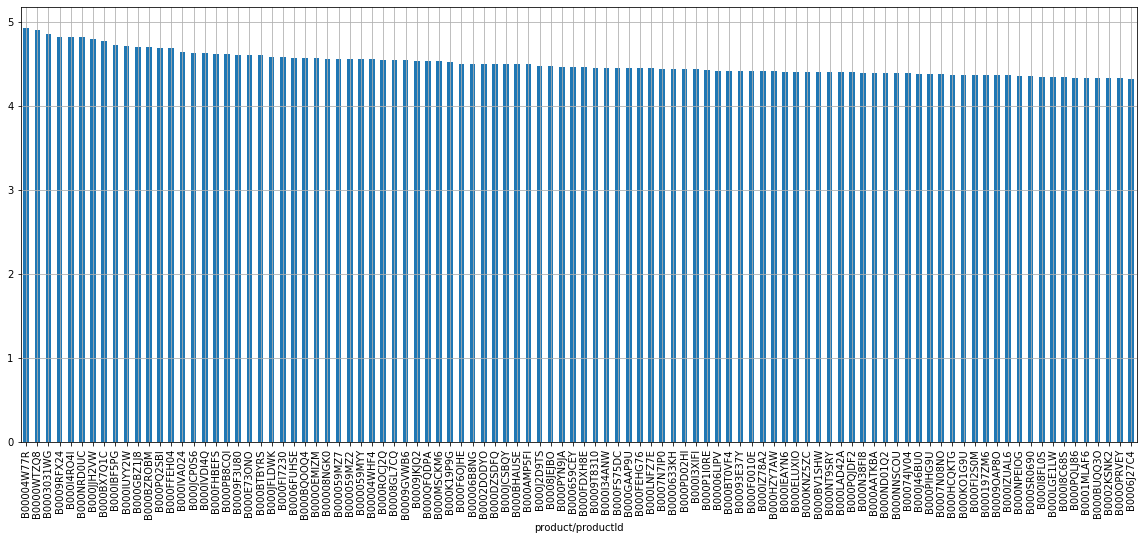

In [5]:
plt.figure(figsize=(20,8))
scores_ge_10[0:100].plot(kind = 'bar')
plt.grid(True)

Sprawdźmy jacy użytkownicy byli najbardziej aktywni

review/userId
A1RCGK44YXNBBB    44
A5JLAU2ARJ0BO     44
A2C8IPPOF90CJG    38
A33FS5H3CPDR6D    31
A4IX5FZOWQVQN     26
Name: review/userId, dtype: int64


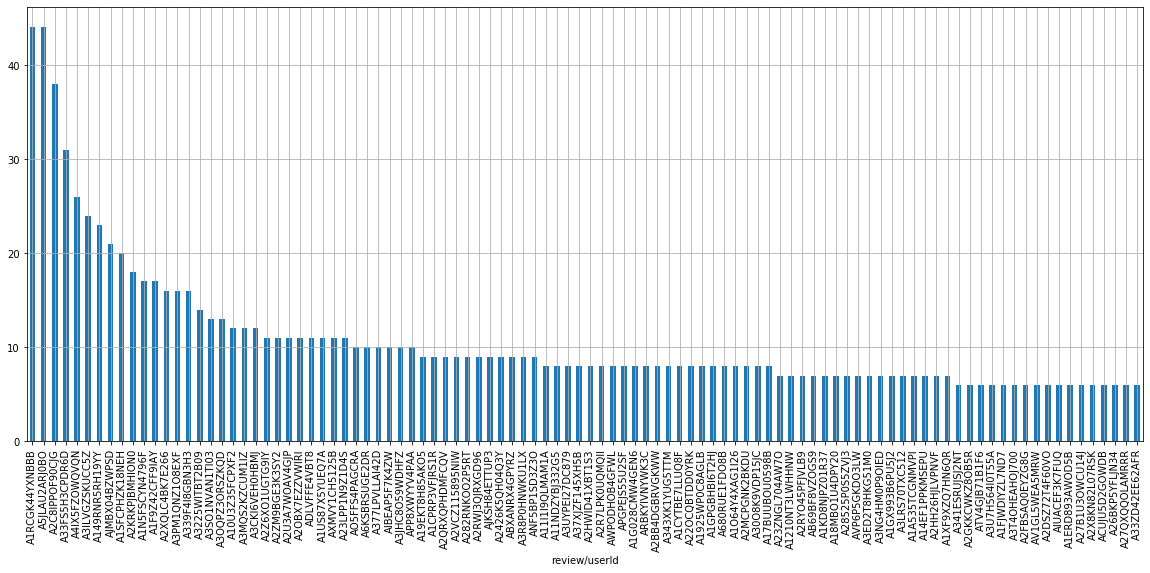

In [6]:
best_users = data_pd.groupby("review/userId")["review/userId"].count().sort_values(ascending = False)
plt.figure(figsize=(20,8))
best_users[0:100].plot(kind = 'bar')
plt.grid(True)
print(best_users.head())

Sprawdźmy jacy użytkownicy byli średnio najbardziej pomocni. Wybierzmy tylko tych których rezencje otrzymały więcej 100 lub więcej ocen. Takie osoby są bardzo cenne dla funkcjonowania sklepu. Może warto byłoby je nagrodzić?

In [7]:
grouped_users = data_pd.groupby("review/userId")
helpful_ge_10 = grouped_users.filter(lambda x: x["review/helpfulAllVotes"].sum() >= 100)


review/userId
A50TU4OUVKPYA     1.0
AO5VDEGWOVXR9     1.0
A1FXFUM109J9YZ    1.0
A3TSPABJY0QID3    1.0
A3T9DOOJ5B1U7O    1.0
dtype: float64


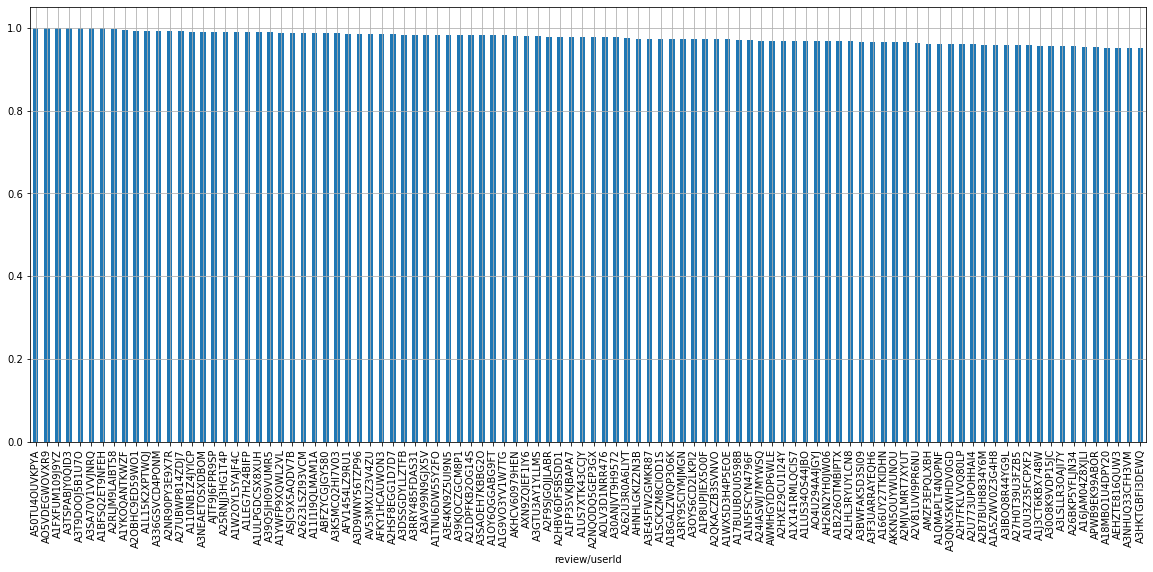

In [8]:
helpful_ge_10_gr = helpful_ge_10.groupby("review/userId")
most_helpful_users = (helpful_ge_10_gr["review/helpfulPositiveVotes"].sum() / helpful_ge_10_gr["review/helpfulAllVotes"].sum()).sort_values(ascending = False)
plt.figure(figsize=(20,8))
most_helpful_users[0:100].plot(kind = 'bar')
plt.grid(True)
print(most_helpful_users.head())